In [61]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Employee.csv')

In [62]:
# Data Exploration
# List unique values in each column and their lengths
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    print(f"Length of unique values in {column}: {len(unique_values)}")

Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values in Company: 7
Unique values in Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values in Age: 30
Unique values in Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values in Salary: 41
Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of unique values in Place: 12
Unique values in Country: ['India']
Length of unique values in Country: 1
Unique values in Gender: [0 1]
Length of unique values in Gender: 2


In [63]:
# Perform basic statistical analysis
print(df.describe())

# Rename columns if necessary
df.rename(columns={'Place': 'City', 'Gender': 'IsFemale'}, inplace=True)

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [65]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Replace 0 in the 'Age' column with NaN
df['Age'] = df['Age'].replace(0, pd.NA)

Company      8
Age         24
Salary      24
City        14
Country      0
IsFemale     0
dtype: int64


In [66]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [67]:
# Identify outliers using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [Company, Age, Salary, City, Country, IsFemale]
Index: []


In [68]:
# Fill missing values in Age with median
if 'Age' in df.columns and pd.api.types.is_numeric_dtype(df['Age']):
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing values in Salary with mean
if 'Salary' in df.columns and pd.api.types.is_numeric_dtype(df['Salary']):
    df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

# Fill missing values in City with mode
if 'City' in df.columns:
    city_mode = df['City'].dropna().mode()
    if not city_mode.empty:
        df['City'] = df['City'].fillna(city_mode[0])

In [69]:
# Data Analysis
# Filter data with Age > 40 and Salary < 5000
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_data)

     Company   Age  Salary       City Country  IsFemale
21   Infosys  50.0  3184.0      Delhi   India         0
32   Infosys  45.0  4034.0   Calcutta   India         0
39   Infosys  41.0  3000.0     Mumbai   India         0
50   Infosys  41.0  3000.0    Chennai   India         0
57   Infosys  51.0  3184.0  Hyderabad   India         0
68   Infosys  43.0  4034.0     Mumbai   India         0
75   Infosys  44.0  3000.0     Cochin   India         0
86   Infosys  41.0  3000.0      Delhi   India         0
93   Infosys  54.0  3184.0     Mumbai   India         0
104  Infosys  44.0  4034.0      Delhi   India         0
122  Infosys  44.0  3234.0     Mumbai   India         0
129  Infosys  50.0  3184.0   Calcutta   India         0
138      CTS  44.0  3033.0     Cochin   India         0
140  Infosys  44.0  4034.0  Hyderabad   India         0
145  Infosys  44.0  4034.0      Delhi   India         1


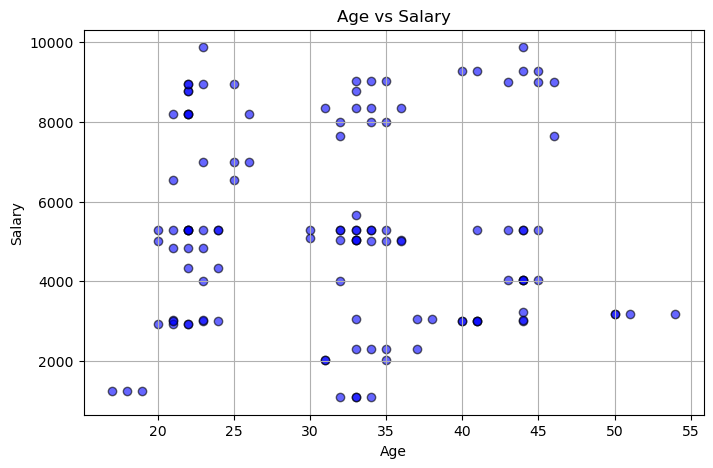

In [70]:
import matplotlib.pyplot as plt

if 'Age' in df.columns and 'Salary' in df.columns:
    
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
    
    df = df.dropna(subset=['Age', 'Salary'])

    # Scatter plot of Age vs Salary
    plt.figure(figsize=(8, 5))  
    plt.scatter(df['Age'], df['Salary'], alpha=0.6, color='blue', edgecolors='black')
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.title('Age vs Salary')
    plt.grid(True)  
    plt.show()

else:
    print("Error: 'Age' or 'Salary' column not found in DataFrame.")


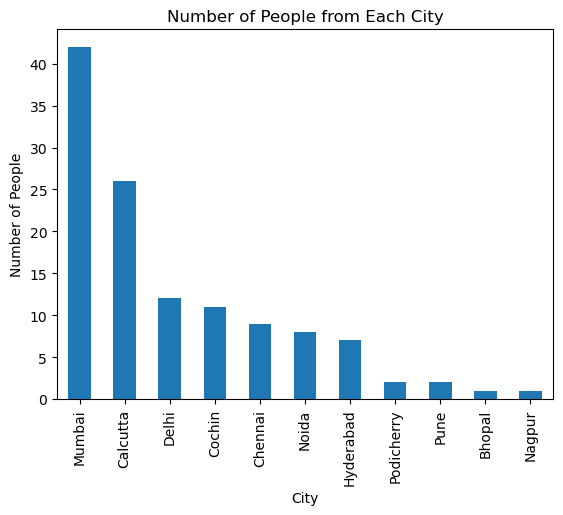

In [71]:
# Count number of people from each city
city_counts = df['City'].value_counts()

# Bar plot of city counts
city_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of People')
plt.title('Number of People from Each City')
plt.show()

In [72]:
# Data Encoding
# One-hot encoding for Company and City
df = pd.get_dummies(df, columns=['Company', 'City'], drop_first=True)

# Label encoding for IsFemale (assuming 1 is Female, 0 is Male)
df['IsFemale'] = df['IsFemale'].astype(int)

In [73]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Scale the features
df[['Age', 'Salary']] = min_max_scaler.fit_transform(df[['Age', 'Salary']])

In [75]:
# Display the final cleaned and preprocessed data
print(df.head())

        Age    Salary Country  IsFemale  Company_Congnizant  Company_Infosys  \
0  0.081081  0.477350   India         0               False            False   
1  0.351351  0.477350   India         0               False             True   
2  0.486486  0.137817   India         0               False            False   
3  0.621622  0.217480   India         0               False             True   
4  0.162162  0.331285   India         0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   City_Calcutta  City_Chennai  City_Cochin  City_